# Capstone Project: Consumer Insights for Beats by Dre

This capstone project focuses on analyzing consumer insights for Beats by Dre, specifically focusing on earbud products. The project follows a structured approach, starting with data loading and cleaning, followed by exploratory data analysis (EDA), sentiment analysis using TextBlob, and AI-generated insights using Gemini AI. A comparative analysis with competitors and a SWOT analysis for Beats by Dre are also included. Finally, strategic recommendations for product improvements and marketing strategies are provided based on the findings. The overall goal is to understand customer perception, identify areas for improvement, and suggest strategies to enhance customer satisfaction and competitive position.

## 1. Title Page
**Project Title:** Consumer Insights Data Analytics Externship of Beats by Dre  
**Student Name:** LE Minh Quan  
**Date:** 07/10/2024

## 2. Table of Contents
1. Introduction
2. Data Description
3. Exploratory Data Analysis (EDA)
4. Sentiment Analysis
5. AI-Generated Insights
6. Comparative Analysis
7. Strategic Recommendations
8. Conclusion


## 3. Introduction

### 3.1 Project Overview
This project aims to analyze consumer sentiment towards Beats by Dre products. The key objectives are:

*   Gather data from various sources like Amazon reviews and do data cleaning
*   Perform exploratory data analysissentiment analysis to understand customer perception
*   Extract insights using AI tools like Gemini
*   Compare Beats by Dre to its competitors
*   Suggest product improvements and marketing strategies based on the analysis

### 3.2 Background
Beats by Dre is a leading audio brand founded by Dr. Dre and Jimmy Iovine, known for its stylish headphones, earphones, and speakers. The company has a strong presence in the consumer audio market, particularly among younger demographics.

Consumer sentiment analysis is crucial in the tech industry for several reasons:

* Understanding Customer Needs: Sentiment analysis helps companies understand how customers feel about their products and services. This allows them to identify areas for improvement and develop products that better meet customer expectations.
* Brand Monitoring: Tracking sentiment helps companies stay informed about their brand reputation and identify potential PR crises early on.
* Competitive Analysis: Analyzing customer sentiment towards competitors can reveal valuable insights into market trends and competitive advantages.
* Marketing Optimization: Sentiment analysis can be used to assess the effectiveness of marketing campaigns and make data-driven adjustments to improve their impact.
* Product Development: Feedback from sentiment analysis can be used to guide product development decisions and prioritize features that customers value most.
For Beats by Dre, understanding consumer sentiment is essential to maintain its market position, improve its product offerings, and address any negative perceptions that may arise.

## 4. Data Description

### 4.1 Data Sources
For this project, I use Reference Dataset for Beats Consumer Insights Data Analytics Externship. I mainly focus on earbuds products from Beats (Beats Studio Buds True Wireless, Beats Solo Buds) and other brands in mid-range product segment (around 100 USD).

https://externinc.notion.site/Reference-Dataset-for-Beats-Consumer-Insights-Data-Analytics-Externship-a609b06836834516b7ea575a054f17ce

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools

import statsmodels.api as sm
import scipy

### 4.2 Data Collection
The data gathering process in this project involves loading a pre-collected dataset, cleaning the data to ensure its quality, and preparing it for analysis by generating bi-grams, tri-grams, and sentiment scores. This process ensures that the data is accurate, reliable, and ready for generating meaningful insights.

In [ ]:
# Read the CSV file with escaped backslashes
df = pd.read_csv("/content/data/reference_dataset_for_beats_externship.csv")

# Display the first few rows of the DataFrame
df.head()

,Unnamed: 0,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,0,RUE030N50F9EJ,B09PYVXXW5,5.0 out of 5 stars Really good with a couple o...,CTM,5,I love TWS earbuds. I have many including buds...,"Reviewed in the United States May 14, 2022",AEGYSY5H3ZUJC4SGGPRM3Z2OE5PA,1,32,Color: Black
1,1,R385JSD6KWP2QU,B09PYVXXW5,4.0 out of 5 stars I wish I could rate 5 stars...,Gianna,4,…I just can’t. Because as useful as these earb...,"Reviewed in the United States July 22, 2023",AHINA7A6O2I5RZSNAY4OWYN4QXVA,1,31,Color: Red
2,2,R1UB1V4EPP9MN3,B09PYVXXW5,"5.0 out of 5 stars Basically perfect, fantasti...",Colin M.,5,I needed a replacement for my Galaxy buds pro'...,"Reviewed in the United States August 18, 2022",AFG2T5XGMQCACK7JBDRHKEKWJLPA,1,21,Color: Red
3,3,RWYK1GXIVV6H1,B09PYVXXW5,1.0 out of 5 stars Decent but Defective,Aquila,1,"UPDATE 6/24/22: As of 6/23/22, my replacement ...","Reviewed in the United States June 3, 2022",AGFUWY2GO4HF5RMLUR7ZOSKID4KA,1,9,Color: Black
4,4,R3FBQBGQM3II4W,B09PYVXXW5,3.0 out of 5 stars I went with soundcore instead,Frankie,3,So out of the box these tiny buds surprised me...,"Reviewed in the United States October 28, 2022",AEOFU2SCDWYLS6DTSXIR6FWMRQMQ,1,7,Color: Black


In [ ]:
#Calculate the number of rows in the DataFrame.
len(df)

4945

In [ ]:
# Create a table with unique values from "product_id" from the df

unique_products = df['product_id'].unique()
unique_products_df = pd.DataFrame({'product_id': unique_products})
print(unique_products_df)

    product_id
0   B09PYVXXW5
1   B09H27SXHS
2   B09FM6PDHP
3   B09HN594TL
4   B096SV8SJG
5   B0BTZKP1TP
6   B08ZR5JB9G
7   B0C2F5KD26
8   B0BYPFNW6T
9   B093SLWMS7
10  B0CXL4FQBK
11  B099TJGJ91
12  B0D4SX9RC6
13  B08X4YMTPM
14  B0B44F1GGK
15  B0BG93TZ5N
16  B09XXW54QG
17  B07DD3WBYW
18  B07YBN9XXG
19  B0CY6S748H
20  B01IOD7KB6
21  B0CVFM97GD
22  B08NLCW9WY
23  B08YRT9T38
24  B08VL5S148
25  B097XX34SL
26  B07PXGQC1Q
27  B0BZ9WMLNQ
28  B0D3JB14QS
29  B0BQPNMXQV
30  B0C1QWWZR4
31  B09CKF166Y
32  B0CF7GYNW2
33  B09CFP6J6D
34  B0BZTCXG6T
35  B0863H1JKB
36  B09JL41N9C
37  B09V9P5Q6W
38  B0BZK2Z2TC
39  B0C345M3T7
40  B0CD2FSRDD
41  B0CPFV77W4
42  B0B1NGPY94
43  B0BYSQDWRT
44  B0B2SH4CN6
45  B09D1HMBQ3
46  B0D4STD5ZC
47  B099TLMRB6
48  B07GWRCZQP
49  B09GK5JMHK
50  B088KRKFJ3
51  B08Z1RP9K8
52  B0B445JCZ3
53  B0B43Y8GHZ


In [ ]:
# Dictionary mapping ASIN to Product Name
# This dictionary is used to map the Amazon Standard Identification Number (ASIN) to the corresponding product name.
product_mapping = {
    'B09PYVXXW5': '1MORE ComfoBuds Mini Wireless Earbuds',
    'B09FM6PDHP': 'JBL Tune 230NC ',
    'B096SV8SJG': 'Beats Studio Buds True Wireless',
    'B0BTZKP1TP': 'Jabra Elite 4 True Wireless Earbuds',
    'B08ZR5JB9G': 'Sennheiser Consumer Audio CX True Wireless Earbuds',
    'B0BYPFNW6T': 'Sony WF-C700N Truly Wireless',
    'B093SLWMS7': 'soundcore by Anker Life P3',
    'B0D3JB14QS': 'Beats Solo Buds',
    'B0C1QWWZR4': 'JBL Tune Buds',
    'B07PXGQC1Q': 'Apple AirPods (2nd Generation)',
}

# Replace ASIN with Product Name
# The 'map' function is used to replace the 'product_id' in the DataFrame with the corresponding 'product_name' from the dictionary.
df['product_name'] = df['product_id'].map(product_mapping)

# Save the updated dataset
# The updated DataFrame is saved to a new CSV file named 'updated_dataset.csv'.
df.to_csv('updated_dataset.csv', index=False)

# Load the updated dataset
# The updated dataset is read back into a DataFrame to verify the changes.
updated_dataset = pd.read_csv('/content/updated_dataset.csv')

# Display the first few rows of the updated DataFrame
# This is to check if the 'product_name' column has been correctly updated.
updated_dataset.head()

,Unnamed: 0,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,product_name
0,0,RUE030N50F9EJ,B09PYVXXW5,5.0 out of 5 stars Really good with a couple o...,CTM,5,I love TWS earbuds. I have many including buds...,"Reviewed in the United States May 14, 2022",AEGYSY5H3ZUJC4SGGPRM3Z2OE5PA,1,32,Color: Black,1MORE ComfoBuds Mini Wireless Earbuds
1,1,R385JSD6KWP2QU,B09PYVXXW5,4.0 out of 5 stars I wish I could rate 5 stars...,Gianna,4,…I just can’t. Because as useful as these earb...,"Reviewed in the United States July 22, 2023",AHINA7A6O2I5RZSNAY4OWYN4QXVA,1,31,Color: Red,1MORE ComfoBuds Mini Wireless Earbuds
2,2,R1UB1V4EPP9MN3,B09PYVXXW5,"5.0 out of 5 stars Basically perfect, fantasti...",Colin M.,5,I needed a replacement for my Galaxy buds pro'...,"Reviewed in the United States August 18, 2022",AFG2T5XGMQCACK7JBDRHKEKWJLPA,1,21,Color: Red,1MORE ComfoBuds Mini Wireless Earbuds
3,3,RWYK1GXIVV6H1,B09PYVXXW5,1.0 out of 5 stars Decent but Defective,Aquila,1,"UPDATE 6/24/22: As of 6/23/22, my replacement ...","Reviewed in the United States June 3, 2022",AGFUWY2GO4HF5RMLUR7ZOSKID4KA,1,9,Color: Black,1MORE ComfoBuds Mini Wireless Earbuds
4,4,R3FBQBGQM3II4W,B09PYVXXW5,3.0 out of 5 stars I went with soundcore instead,Frankie,3,So out of the box these tiny buds surprised me...,"Reviewed in the United States October 28, 2022",AEOFU2SCDWYLS6DTSXIR6FWMRQMQ,1,7,Color: Black,1MORE ComfoBuds Mini Wireless Earbuds


### 4.3 Data Cleaning
Outline the steps taken to clean and preprocess the data, highlighting any significant decisions made during this process.

Load the data below and process cleaning here.

In [ ]:
# Drop all missing values
df = df.dropna()
# Check for missing values in the dataset
df.isna().sum()
len(df)

995

In [ ]:
# Check data types of each column
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 0 to 3096
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          995 non-null    int64 
 1   review_id           995 non-null    object
 2   product_id          995 non-null    object
 3   title               995 non-null    object
 4   author              995 non-null    object
 5   rating              995 non-null    int64 
 6   content             995 non-null    object
 7   timestamp           995 non-null    object
 8   profile_id          995 non-null    object
 9   is_verified         995 non-null    int64 
 10  helpful_count       995 non-null    int64 
 11  product_attributes  995 non-null    object
 12  product_name        995 non-null    object
dtypes: int64(4), object(9)
memory usage: 108.8+ KB


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)
df = df.dropna()

# Check for duplicates
duplicates = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)

# Remove duplicates
df = df.drop_duplicates()

Missing Values:
 Unnamed: 0            0
review_id             0
product_id            0
title                 0
author                0
rating                0
content               0
timestamp             0
profile_id            0
is_verified           0
helpful_count         0
product_attributes    0
product_name          0
dtype: int64

Number of Duplicate Rows: 0


In [ ]:
# Drop unnessary columns

df = df.drop(['Unnamed: 0', 'is_verified', 'product_attributes'], axis=1)
df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,helpful_count,product_name
0,RUE030N50F9EJ,B09PYVXXW5,5.0 out of 5 stars Really good with a couple o...,CTM,5,I love TWS earbuds. I have many including buds...,"Reviewed in the United States May 14, 2022",AEGYSY5H3ZUJC4SGGPRM3Z2OE5PA,32,1MORE ComfoBuds Mini Wireless Earbuds
1,R385JSD6KWP2QU,B09PYVXXW5,4.0 out of 5 stars I wish I could rate 5 stars...,Gianna,4,…I just can’t. Because as useful as these earb...,"Reviewed in the United States July 22, 2023",AHINA7A6O2I5RZSNAY4OWYN4QXVA,31,1MORE ComfoBuds Mini Wireless Earbuds
2,R1UB1V4EPP9MN3,B09PYVXXW5,"5.0 out of 5 stars Basically perfect, fantasti...",Colin M.,5,I needed a replacement for my Galaxy buds pro'...,"Reviewed in the United States August 18, 2022",AFG2T5XGMQCACK7JBDRHKEKWJLPA,21,1MORE ComfoBuds Mini Wireless Earbuds
3,RWYK1GXIVV6H1,B09PYVXXW5,1.0 out of 5 stars Decent but Defective,Aquila,1,"UPDATE 6/24/22: As of 6/23/22, my replacement ...","Reviewed in the United States June 3, 2022",AGFUWY2GO4HF5RMLUR7ZOSKID4KA,9,1MORE ComfoBuds Mini Wireless Earbuds
4,R3FBQBGQM3II4W,B09PYVXXW5,3.0 out of 5 stars I went with soundcore instead,Frankie,3,So out of the box these tiny buds surprised me...,"Reviewed in the United States October 28, 2022",AEOFU2SCDWYLS6DTSXIR6FWMRQMQ,7,1MORE ComfoBuds Mini Wireless Earbuds


## 5. Exploratory Data Analysis (EDA)

### 5.1 Data Overview
Study the distribution and key statistics of the target variable : "rating"



In [ ]:
# Calculate descriptive statistics for the target variable : "rating"
df['rating'].describe()

,rating
count,995.000000
mean,4.084422
std,1.165789
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


This summary indicates that the "rating" variable has 995 observations. The average rating is approximately 4.084, with a standard deviation of about 1.166, suggesting some variability in the ratings. The ratings range from a minimum of 1 to a maximum of 5, with the 25th percentile, median, and 75th percentile all being 4 or higher, indicating that most ratings are on the higher end of the scale.

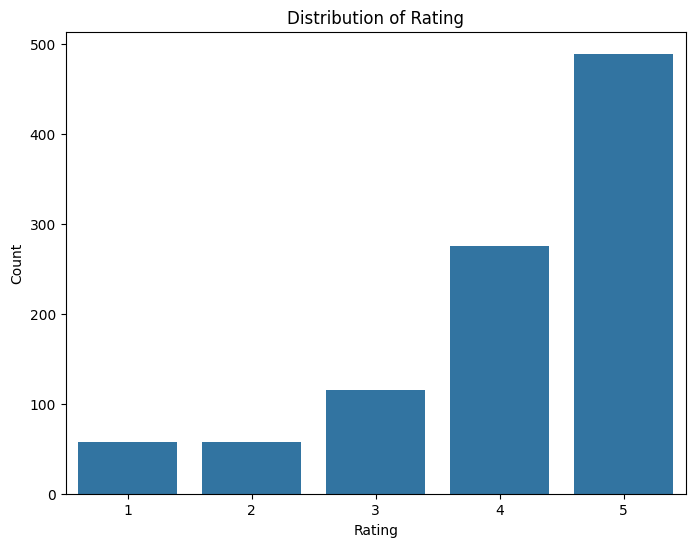

In [ ]:
# Create the distribution plot of rating

plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


### 5.2 Descriptive Statistics

<ipython-input-17-1ab8f0e32086>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

Se

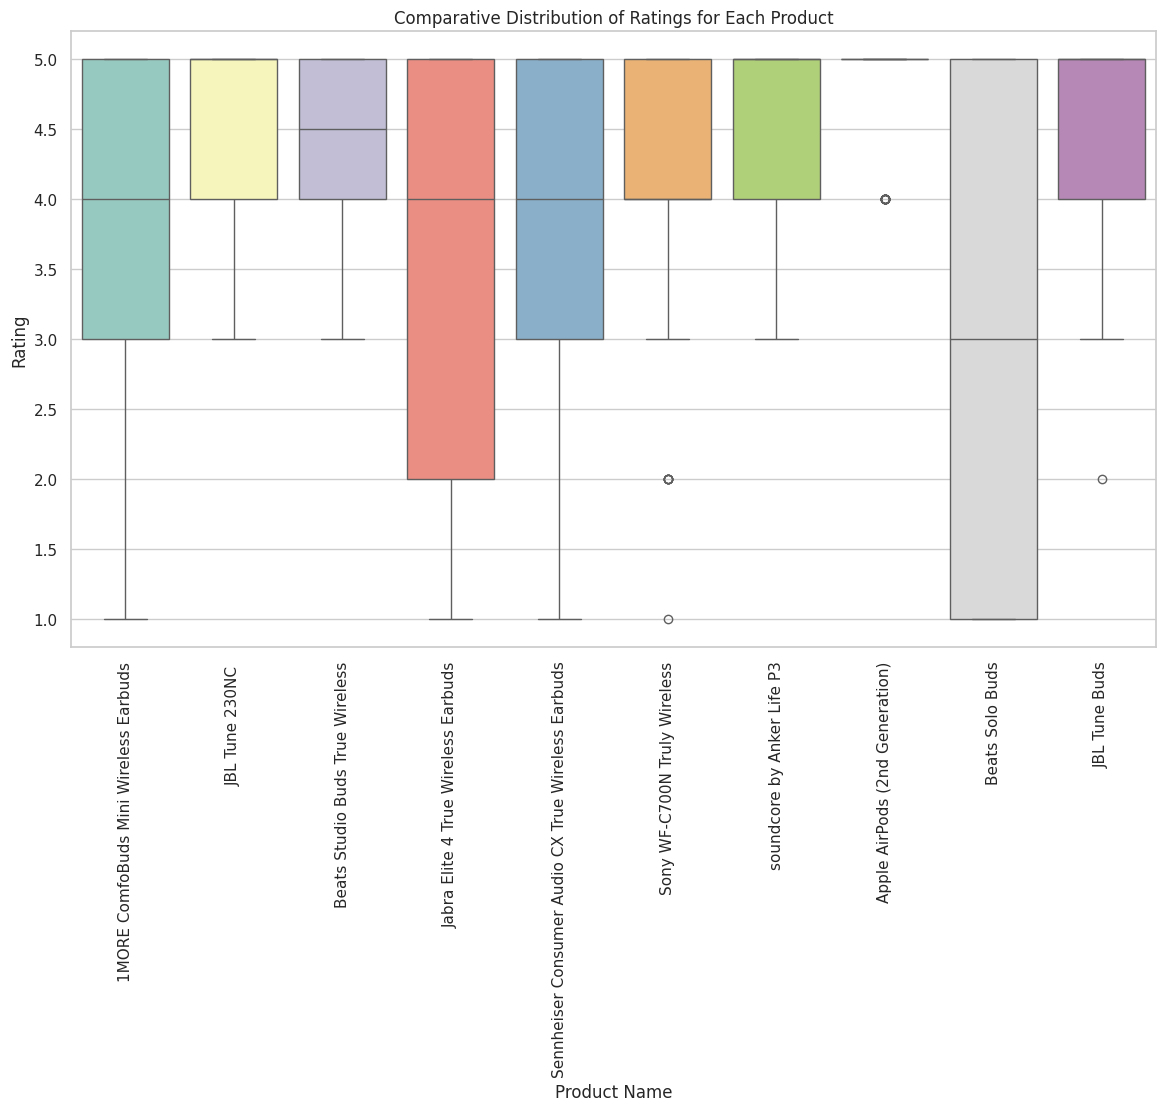

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(14, 8))

# Plot the distribution of ratings for each product
sns.boxplot(x='product_name', y='rating', data=df, palette="Set3")

# Rotate the x labels for better readability
plt.xticks(rotation=90)

# Set the title and labels
plt.title('Comparative Distribution of Ratings for Each Product')
plt.xlabel('Product Name')
plt.ylabel('Rating')

# Show the plot
plt.show()

In [ ]:
# Calculate descriptive statistics for the target variable : "rating" of each product

# Group data by product and calculate descriptive statistics for 'rating'
product_rating_stats = df.groupby('product_name')['rating'].describe()

# Display the results
print(product_rating_stats)

                                                    count      mean       std  \
product_name                                                                    
1MORE ComfoBuds Mini Wireless Earbuds               100.0  3.550000  1.225775   
Apple AirPods (2nd Generation)                      100.0  4.810000  0.394277   
Beats Solo Buds                                      88.0  3.090909  1.594793   
Beats Studio Buds True Wireless                     122.0  4.426230  0.628760   
JBL Tune 230NC                                       98.0  4.551020  0.627915   
JBL Tune Buds                                       100.0  4.360000  0.745627   
Jabra Elite 4 True Wireless Earbuds                 100.0  3.500000  1.648385   
Sennheiser Consumer Audio CX True Wireless Earbuds  101.0  3.564356  1.161170   
Sony WF-C700N Truly Wireless                         99.0  4.181818  0.962179   
soundcore by Anker Life P3                           87.0  4.712644  0.503662   

                           

### Overall Insights

1. **High Average Ratings**:
   - Most products have a mean rating above 4.0, indicating high customer satisfaction across the board.

2. **Variability in Ratings**:
   - The standard deviation (std) varies significantly among products, indicating different levels of consistency in customer ratings.

### Product-Specific Insights

1. **1MORE ComfoBuds Mini Wireless Earbuds**:
   - **Mean Rating**: 3.55
   - **Standard Deviation**: 1.23
   - **Conclusion**: This product has a moderate average rating with a relatively high standard deviation, indicating mixed customer experiences.

2. **Apple AirPods (2nd Generation)**:
   - **Mean Rating**: 4.81
   - **Standard Deviation**: 0.39
   - **Conclusion**: This product has an exceptionally high average rating with low variability, indicating consistent customer satisfaction.

3. **Beats Solo Buds**:
   - **Mean Rating**: 3.09
   - **Standard Deviation**: 1.59
   - **Conclusion**: This product has a lower average rating with high variability, suggesting mixed reviews and potential areas for improvement.

4. **Beats Studio Buds True Wireless**:
   - **Mean Rating**: 4.43
   - **Standard Deviation**: 0.63
   - **Conclusion**: This product has a high average rating with moderate variability, indicating generally positive reviews with some inconsistencies.

5. **JBL Tune 230NC**:
   - **Mean Rating**: 4.55
   - **Standard Deviation**: 0.63
   - **Conclusion**: This product has a high average rating with moderate variability, indicating strong customer satisfaction.

6. **JBL Tune Buds**:
   - **Mean Rating**: 4.36
   - **Standard Deviation**: 0.75
   - **Conclusion**: This product has a high average rating with moderate variability, indicating positive customer feedback.

7. **Jabra Elite 4 True Wireless Earbuds**:
   - **Mean Rating**: 3.50
   - **Standard Deviation**: 1.65
   - **Conclusion**: This product has a moderate average rating with high variability, suggesting mixed customer experiences and potential areas for improvement.

8. **Sennheiser Consumer Audio CX True Wireless Earbuds**:
   - **Mean Rating**: 3.56
   - **Standard Deviation**: 1.16
   - **Conclusion**: This product has a moderate average rating with moderate variability, indicating mixed reviews.

9. **Sony WF-C700N Truly Wireless**:
   - **Mean Rating**: 4.18
   - **Standard Deviation**: 0.96
   - **Conclusion**: This product has a high average rating with moderate variability, indicating generally positive reviews.

10. **soundcore by Anker Life P3**:
    - **Mean Rating**: 4.71
    - **Standard Deviation**: 0.50
    - **Conclusion**: This product has a very high average rating with low variability, indicating strong and consistent customer satisfaction.

### General Conclusions

1. **High Customer Satisfaction**:
   - Products like Apple AirPods (2nd Generation) and soundcore by Anker Life P3 have exceptionally high average ratings with low variability, indicating strong and consistent customer satisfaction.

2. **Mixed Reviews**:
   - Products like Beats Solo Buds and Jabra Elite 4 True Wireless Earbuds have lower average ratings with high variability, suggesting mixed customer experiences and potential areas for improvement.

3. **Consistency in Quality**:
   - Products from well-known brands like JBL and Sony consistently receive high average ratings, indicating a strong and consistent quality in their offerings.

### Recommendations

1. **Maintain Quality**:
   - Continue to focus on the aspects of the products that are driving high ratings to maintain customer satisfaction.

2. **Address Negative Feedback**:
   - Investigate the products with lower average ratings and high variability to identify common issues and take corrective actions to improve the products.

3. **Enhance Features**:
   - Look for opportunities to enhance the products based on customer feedback to convert mixed reviews into positive ones.

By leveraging these insights, the company can continue to build on its strengths and address areas for improvement, ultimately enhancing customer satisfaction and loyalty.

## 6. Sentiment Analysis

### 6.1 Methodology
TextBlob is a simple and easy-to-use library for processing textual data, providing a consistent API for diving into common natural language processing (NLP) tasks, including sentiment analysis. Here are the key techniques and features used by TextBlob for sentiment analysis:

### Key Techniques Used by TextBlob

1. **Rule-Based Approach**:
   - TextBlob uses a rule-based approach for sentiment analysis, leveraging a predefined set of rules and a sentiment lexicon to determine the sentiment of a given text.

2. **Sentiment Lexicon**:
   - TextBlob relies on a sentiment lexicon, which is a list of words associated with predefined sentiment scores. Each word in the lexicon has an associated polarity score (indicating positive or negative sentiment) and a subjectivity score (indicating the degree of subjectivity).

3. **Polarity and Subjectivity**:
   - **Polarity**: This score ranges from -1.0 to 1.0, where -1.0 indicates a very negative sentiment, 0 indicates a neutral sentiment, and 1.0 indicates a very positive sentiment.
   - **Subjectivity**: This score ranges from 0.0 to 1.0, where 0.0 indicates a very objective statement and 1.0 indicates a very subjective statement.


Overall, TextBlob is a powerful and user-friendly tool for performing sentiment analysis, especially for simple and straightforward use cases.

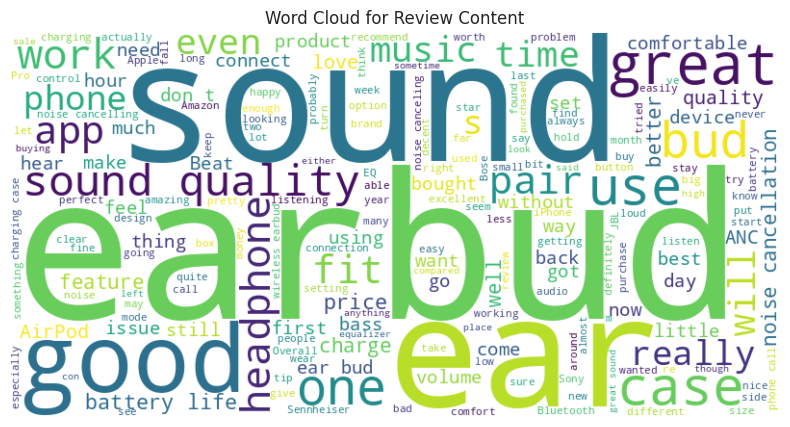

In [ ]:
from wordcloud import WordCloud
# Combine all the content into a single string
text = " ".join(review for review in df['content'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200, contour_width=3, contour_color='steelblue').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Review Content')
plt.show()

In [ ]:
# Calculates the sentiment polarity using TextBlob.

from textblob import TextBlob

def get_sentiment(text):
  analysis = TextBlob(text)
  return analysis.sentiment.polarity

df['sentiment_polarity'] = df['content'].apply(get_sentiment)

print(df[['content', 'sentiment_polarity']].head())

                                             content  sentiment_polarity
0  I love TWS earbuds. I have many including buds...            0.206449
1  …I just can’t. Because as useful as these earb...            0.135386
2  I needed a replacement for my Galaxy buds pro'...            0.182337
3  UPDATE 6/24/22: As of 6/23/22, my replacement ...            0.172517
4  So out of the box these tiny buds surprised me...            0.208679


In [ ]:
# Classify the reviews into positive, negative, and neutral sentiments.

def classify_sentiment(polarity):
  if polarity > 0:
    return 'positive'
  elif polarity < 0:
    return 'negative'
  else:
    return 'neutral'

df['sentiment_category'] = df['sentiment_polarity'].apply(classify_sentiment)

print(df[['content', 'sentiment_polarity', 'sentiment_category']].head())

                                             content  sentiment_polarity  \
0  I love TWS earbuds. I have many including buds...            0.206449   
1  …I just can’t. Because as useful as these earb...            0.135386   
2  I needed a replacement for my Galaxy buds pro'...            0.182337   
3  UPDATE 6/24/22: As of 6/23/22, my replacement ...            0.172517   
4  So out of the box these tiny buds surprised me...            0.208679   

  sentiment_category  
0           positive  
1           positive  
2           positive  
3           positive  
4           positive  



- **Positive Sentiment**:
  - Reviews with a polarity score greater than 0 are classified as positive.
  - These reviews express favorable opinions or emotions.

- **Negative Sentiment**:
  - Reviews with a polarity score less than 0 are classified as negative.
  - These reviews express unfavorable opinions or emotions.

- **Neutral Sentiment**:
  - Reviews with a polarity score of exactly 0 are classified as neutral.
  - These reviews express neither positive nor negative opinions, or they may be balanced in their sentiment.

### 6.2 Results
Present the sentiment analysis results, including visualizations of sentiment distribution, and discuss the overall sentiment towards Beats by Dre products.


In [ ]:
# Calculate descriptive statistics for "sentiment_polarity" of each product

product_sentiment_stats = df.groupby('product_name')['sentiment_polarity'].describe()
print(product_sentiment_stats)


                                                    count      mean       std  \
product_name                                                                    
1MORE ComfoBuds Mini Wireless Earbuds               100.0  0.195682  0.132892   
Apple AirPods (2nd Generation)                      100.0  0.278226  0.185325   
Beats Solo Buds                                      88.0  0.181739  0.264627   
Beats Studio Buds True Wireless                     122.0  0.290466  0.181460   
JBL Tune 230NC                                       98.0  0.277146  0.211524   
JBL Tune Buds                                       100.0  0.311648  0.227738   
Jabra Elite 4 True Wireless Earbuds                 100.0  0.231094  0.276090   
Sennheiser Consumer Audio CX True Wireless Earbuds  101.0  0.198873  0.133411   
Sony WF-C700N Truly Wireless                         99.0  0.265081  0.202443   
soundcore by Anker Life P3                           87.0  0.260734  0.214960   

                           

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



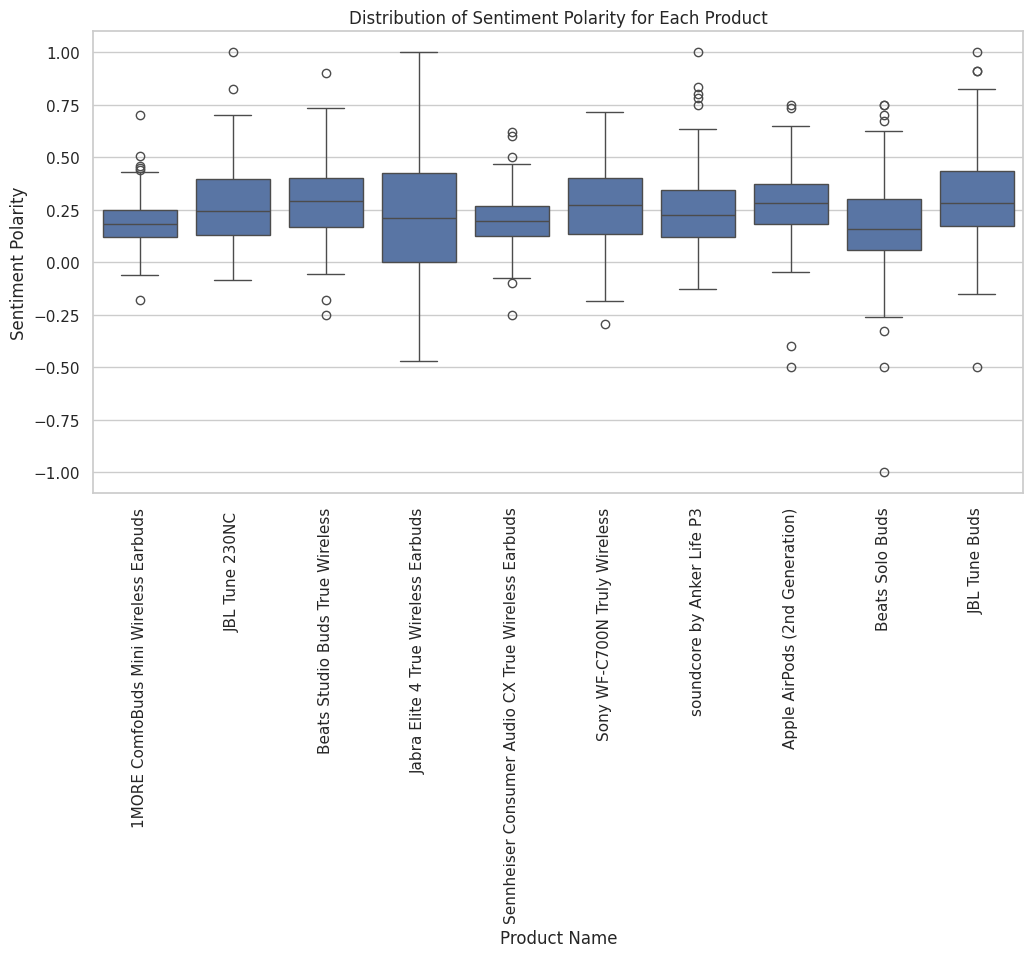

In [ ]:
# Remove duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# Visualize the distribution of sentiment polarity for each product
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_name', y='sentiment_polarity', data=df)
plt.title('Distribution of Sentiment Polarity for Each Product')
plt.xlabel('Product Name')
plt.ylabel('Sentiment Polarity')
plt.xticks(rotation=90)
plt.show()

In general, all products have a positive mean sentiment polarity, indicating that the overall sentiment for all products is positive.


*   "JBL Tune Buds" has the highest mean sentiment polarity of 0.311648, suggesting it is the most positively reviewed product on average.
*   "Beats Solo Buds" has the lowest mean sentiment polarity of 0.181739, indicating it has the least positive sentiment among the products listed.

*   "Jabra Elite 4 True Wireless Earbuds" has the highest standard deviation (0.276090), indicating a wide range of sentiment polarity scores and thus more varied reviews.
*   "1MORE ComfoBuds Mini Wireless Earbuds" and "Sennheiser Consumer Audio CX True Wireless Earbuds" have the lowest standard deviations (0.132892 and 0.133411 respectively), indicating more consistent sentiment in reviews.


*   Most products have a minimum sentiment polarity that is negative, indicating that there are some negative reviews for each product. The maximum sentiment polarity for several products (e.g., "JBL Tune 230NC", "JBL Tune Buds", "Jabra Elite 4 True Wireless Earbuds", "soundcore by Anker Life P3") is 1.000000, indicating that some reviews are extremely positive.
*   The 25th percentile (Q1) and 75th percentile (Q3) values show that the middle 50% of sentiment polarity scores are generally positive for all products.
Products like "Apple AirPods (2nd Generation)" and "Beats Studio Buds True Wireless" have higher Q3 values (0.374681 and 0.401949 respectively), indicating that a significant portion of their reviews are highly positive.


**Summary**

Most Positively Reviewed: "JBL Tune Buds" with the highest mean sentiment polarity.

Least Positively Reviewed: "Beats Solo Buds" with the lowest mean sentiment polarity.

Most Consistent Reviews: "1MORE ComfoBuds Mini Wireless Earbuds" and "Sennheiser Consumer Audio CX True Wireless Earbuds" with the lowest standard deviations.

Most Varied Reviews: "Jabra Elite 4 True Wireless Earbuds" with the highest standard deviation.

Extremely Positive Reviews: Several products have maximum sentiment polarity of 1.000000, indicating extremely positive reviews.

sentiment_category                                  negative  neutral  \
product_name                                                            
1MORE ComfoBuds Mini Wireless Earbuds                    2.0      2.0   
Apple AirPods (2nd Generation)                           3.0      NaN   
Beats Solo Buds                                          9.0     10.0   
Beats Studio Buds True Wireless                          6.0      3.0   
JBL Tune 230NC                                           3.0     10.0   
JBL Tune Buds                                            4.0      1.0   
Jabra Elite 4 True Wireless Earbuds                     10.0     17.0   
Sennheiser Consumer Audio CX True Wireless Earbuds       3.0      2.0   
Sony WF-C700N Truly Wireless                             6.0      4.0   
soundcore by Anker Life P3                               6.0      3.0   

sentiment_category                                  positive  
product_name                                                

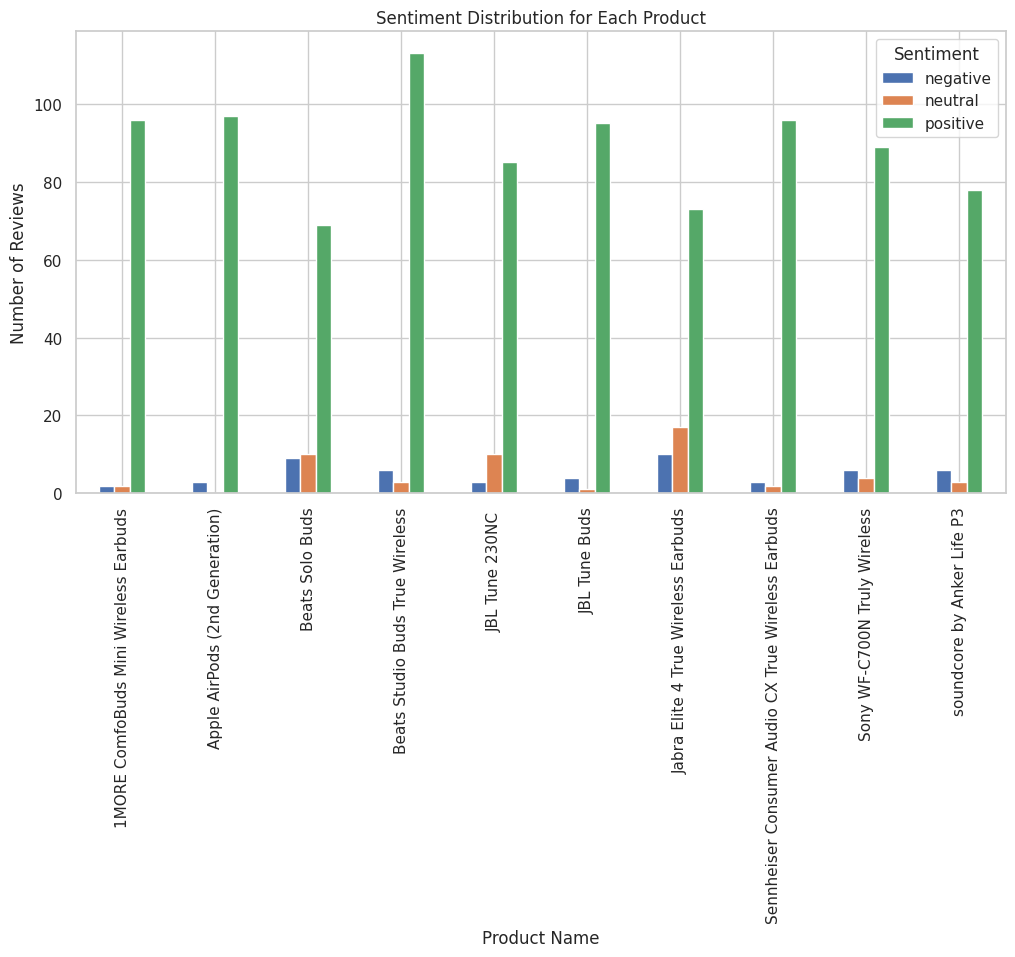

In [ ]:
# Count the number of positive, negative, and neutral reviews for each product
sentiment_counts = df.groupby(['product_name', 'sentiment_category'])['sentiment_category'].count().unstack()
print(sentiment_counts)

# Visualize the sentiment counts using a bar chart
sentiment_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Sentiment Distribution for Each Product')
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.show()

***General Conclusions :***

* The majority of the products have a high number of positive reviews, indicating strong customer satisfaction across the board.

* Products like Beats Solo Buds and Jabra Elite 4 True Wireless Earbuds have a noticeable number of neutral and negative reviews, suggesting areas where improvements can be made to enhance customer satisfaction.

* Products from well-known brands like Beats, Apple, JBL, and Sennheiser consistently receive high positive sentiment, indicating a strong and consistent quality in their offerings.

In [ ]:
import nltk
from collections import Counter

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

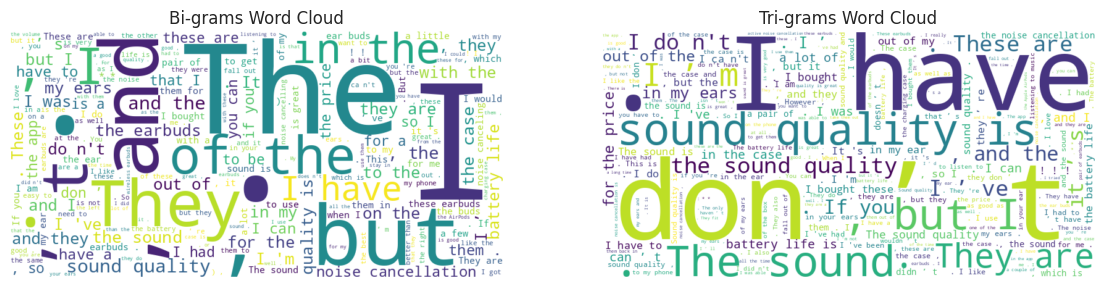

In [ ]:

# Function to get subjectivity, handling non-string entries
def get_subjectivity(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.subjectivity
    else:
        return None  # or you can return 0.0 or any other default value

# Apply the function to the 'content' column
df['subjectivity'] = df['content'].apply(get_subjectivity)

# Combine all the content into a single string
text = " ".join(review for review in df['content'].astype(str))

# Tokenize the text
tokens = nltk.word_tokenize(text)

# Generate bi-grams and tri-grams
bigrams = list(nltk.bigrams(tokens))
trigrams = list(nltk.trigrams(tokens))

# Convert bi-grams and tri-grams to strings
bigrams_str = [" ".join(bigram) for bigram in bigrams]
trigrams_str = [" ".join(trigram) for trigram in trigrams]

# Count the frequency of bi-grams and tri-grams
bigram_freq = Counter(bigrams_str)
trigram_freq = Counter(trigrams_str)

# Generate word clouds for bi-grams and tri-grams
bigram_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200, contour_width=3, contour_color='steelblue').generate_from_frequencies(bigram_freq)
trigram_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200, contour_width=3, contour_color='steelblue').generate_from_frequencies(trigram_freq)

# Plot the word clouds
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Bi-grams Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(trigram_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Tri-grams Word Cloud')

plt.show()

                      rating  helpful_count  sentiment_polarity  subjectivity
rating              1.000000       0.041073            0.415643      0.157245
helpful_count       0.041073       1.000000           -0.036778     -0.005257
sentiment_polarity  0.415643      -0.036778            1.000000      0.438082
subjectivity        0.157245      -0.005257            0.438082      1.000000


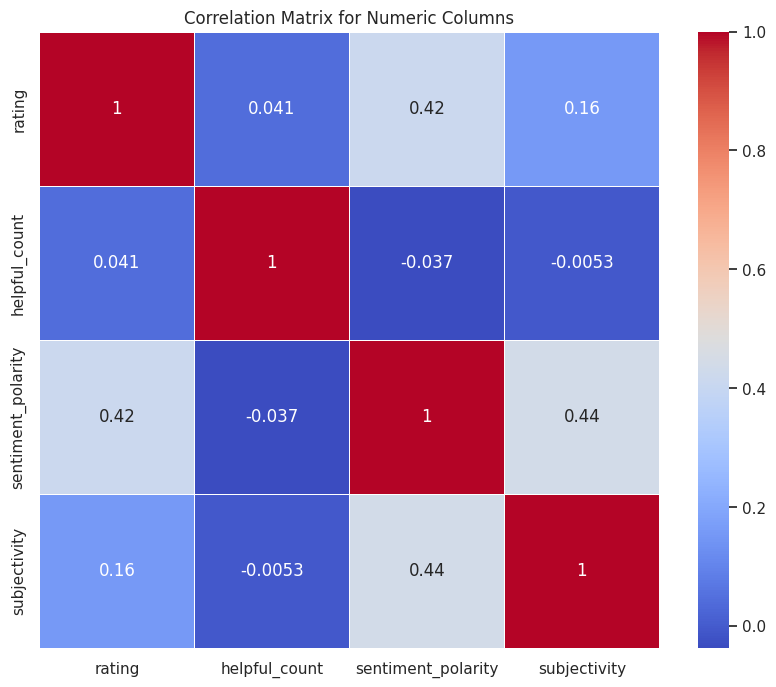

In [ ]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['number'])
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Optionally, visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

**Correlation Matrix Explanation**
The correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value ranges from -1 to 1:

1: Perfect positive correlation.

-1: Perfect negative correlation.

0: No correlation.

In general :
* Rating and Sentiment Polarity: There is a moderate positive correlation (0.415643) between rating and sentiment_polarity. This suggests that higher ratings tend to be associated with more positive sentiment in the reviews.
* Rating and Subjectivity: There is a weak positive correlation (0.157245) between rating and subjectivity. This indicates that higher ratings are slightly associated with more subjective reviews.
* Sentiment Polarity and Subjectivity: There is a moderate positive correlation (0.438082) between sentiment_polarity and subjectivity. This suggests that more positive sentiments are often more subjective.
* Helpful Count: The helpful_count has very weak correlations with other variables, indicating that the number of helpful votes a review receives is not strongly related to the rating, sentiment polarity, or subjectivity of the review.



## 7. AI-Generated Insights

### 7.1 Using Gemini AI
Gemini AI is an advanced language model designed to understand and generate human-like text. It can analyze large volumes of text data, summarize information, and provide insightful responses based on the input it receives.

###Key Features and Capabilities:
* Text Analysis: Gemini AI can process and analyze text data to identify key themes, sentiments, and insights.
* Summarization: It can summarize long documents, making it easier to extract important information quickly.
* Conversational Abilities: Gemini AI can engage in human-like conversations, providing relevant and coherent responses.

In this section, I used Gemini API (Application Programming Interface) to analyze the reviews of two Beats products, Beats Studio Buds True Wireless and Beats Solo Buds. It extracted insights by:

1. Providing a prompt: Reviews were fed to Gemini with a prompt asking to analyze either positive or negative reviews and summarize key insights.
2. Analyzing reviews: Gemini processed the provided reviews and identified recurring themes and sentiments.
3. Summarizing insights: Gemini generated a concise summary of the key takeaways from the reviews.

This process helped identify strengths and weaknesses of the products based on customer feedback.

In [ ]:
import os

import google.generativeai as genai

In [ ]:
# Function to set up a simple chatbot
def simple_chatbot(api_key, message):
    genai.configure(api_key=api_key)

    model = genai.GenerativeModel(
        model_name="gemini-1.5-flash",
        generation_config={
            "temperature": 1,
            "top_p": 0.95,
            "top_k": 64,
            "max_output_tokens": 8192,
            "response_mime_type": "text/plain",
        },
    )

    chat_session = model.start_chat(history=[])

    response = chat_session.send_message(message)
    return response.text

# api_key = "YOUR_API_KEY_HERE"
# Or use: from google.colab import userdata; api_key = userdata.get('GEMINI_API_KEY')

### 7.2 Key Insights
Summarize the key insights generated by Gemini AI, including specific examples of prompts used and the responses received.


In [ ]:
# Group the DataFrame by the 'product_name' column
grouped = df.groupby('product_name')

# Create a dictionary to hold DataFrames for each product
product_dfs = {product: data for product, data in grouped}

In [ ]:
# Create a subset of reviews for 'Beats Studio Buds True Wireless'
beats_1_df = product_dfs.get('Beats Studio Buds True Wireless')
beats_1_df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,helpful_count,product_name,sentiment_polarity,sentiment_category,subjectivity
400,RUUJJA0TERA67,B096SV8SJG,5.0 out of 5 stars Compared to 4 other Earbuds...,Connor,5,I bought these earbuds along with 4 other pair...,"Reviewed in the United States August 11, 2022",AFEITP6Y25NKH3KB2LXWQCC7STIA,2277,Beats Studio Buds True Wireless,0.165309,positive,0.530769
401,R3EO2GBST2UICI,B096SV8SJG,5.0 out of 5 stars Initial review and comparis...,philip seitz,5,I love these earbuds. They feel definitely wor...,"Reviewed in the United States September 28, 2023",AFMDCDCHBIWSEI6RDYBCY4MXXVZQ,562,Beats Studio Buds True Wireless,0.175475,positive,0.511177
402,R2D114QWXW4IOU,B096SV8SJG,5.0 out of 5 stars I think they’re great,Maizy,5,I like the sound a lot. I read a previous revi...,"Reviewed in the United States July 27, 2024",AFRVRGYJJSBAELQK6XVCXXBCJXLA,3,Beats Studio Buds True Wireless,0.231061,positive,0.536742
403,R29LYUZ7DI2CS6,B096SV8SJG,"4.0 out of 5 stars Quality sound and build, BU...",Everest,4,"After using these for a couple weeks straight,...","Reviewed in the United States August 3, 2024",AEDBORE5CT34E6D7QVXFZW5ZERCA,0,Beats Studio Buds True Wireless,0.156094,positive,0.456813
404,RRC5SI8P44LH4,B096SV8SJG,5.0 out of 5 stars Excellent -- Budget Friendl...,Mary Trotta,5,Been a few months (May 2024) since the purchas...,"Reviewed in the United States July 21, 2024",AGRC63RAW4DZCOTB2NDTUFP7SRFA,3,Beats Studio Buds True Wireless,0.364540,positive,0.786432


In [ ]:
# Function to analyze reviews using Gemini AI
# api_key = "YOUR_API_KEY_HERE"
# Or use: from google.colab import userdata; api_key = userdata.get('GEMINI_API_KEY')

def analyze_reviews(reviews, api_key,prompt_message):
    genai.configure(api_key=api_key)

    model = genai.GenerativeModel(
        model_name="gemini-1.5-flash",
        generation_config={
            "temperature": 1,
            "top_p": 0.95,
            "top_k": 64,
            "max_output_tokens": 8192,
            "response_mime_type": "text/plain",
        },
    )

    chat_session = model.start_chat(history=[])

    prompt = prompt_message + "\n\n".join(reviews)
    response = chat_session.send_message(prompt)
    return response.text

In [ ]:
# Select a subset of reviews

reviews_column_name = 'content'
reviews = beats_1_df[reviews_column_name].tolist()

# Send prompts
prompt_message = "Analyze the positive reviews and summarize the key insights:"
insights = analyze_reviews(reviews, api_key, prompt_message)
print(insights)

## Beats Studio Buds Review Summary:

**Key Insights:**

**Pros:**

* **Great sound quality:** Many reviewers praised the deep bass and clear highs, making these earbuds suitable for various music genres.
* **Effective noise cancellation:** The ANC feature effectively blocks out ambient noise for an immersive listening experience.
* **Comfortable fit:**  Earbuds are lightweight and come with different ear tip sizes for a comfortable and secure fit.
* **Good battery life:**  Reviewers reported average battery life, lasting up to 8 hours with the charging case. 
* **Easy connectivity:** Seamless pairing with both iOS and Android devices.
* **Intuitive touch controls:** Responsive controls for easy management of playback, calls, and ANC modes.
* **Physical buttons:** Many users appreciated the physical buttons for a more reliable experience compared to touch controls. 
* **Good value for the price:**  Many reviewers felt the earbuds were a good value for the price, especially when on sale

In [ ]:
prompt_message = "Analyze the negative reviews and summarize the key insights:"
insights = analyze_reviews(reviews, api_key, prompt_message)
print(insights)

## Key Insights from Negative Reviews of Beats Studio Buds:

**Fit & Comfort:**

* **Frequent falling out:**  Many users reported the earbuds falling out easily during workouts, running, or even simple head movements. 
* **Earbud size:**  Some found it difficult to find the right ear tip size, leading to discomfort or an insecure fit.
* **Bulky feel:**  Several reviewers found the earbuds to be too bulky, causing ear fatigue after prolonged wear.

**Sound Quality & Features:**

* **Subpar Noise Cancellation:**  While users praised the bass, noise cancellation was often described as "mediocre" or "barely noticeable." 
* **Transparency Mode Issues:**  Transparency mode was criticized for adding a "hollow reverb" and not being effective in allowing ambient sounds through.
* **Microphone Quality:**  Call quality was reported to be inconsistent, with some users experiencing issues with background noise and muffled audio.

**Functionality & Connectivity:**

* **Button Sensitivity:**  The phy

In [ ]:
## Create a subset of reviews for 'Beats Solo Buds'
beats_2_df = product_dfs.get('Beats Solo Buds')
beats_2_df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,helpful_count,product_name,sentiment_polarity,sentiment_category,subjectivity
2506,R32TIEZKF94LC2,B0D3JB14QS,5.0 out of 5 stars Great sound quality and gre...,Kindle Customer,5,These are very comfortable and the sound quali...,"Reviewed in the United States July 28, 2024",AFQLQXW6D2NVK36LEABIR25RG55Q,0,Beats Solo Buds,0.625000,positive,0.787500
2507,R1MS4EB3WEMBJU,B0D3JB14QS,1.0 out of 5 stars Poor quality,Tyler Wagner,1,For the price I want expecting anything great ...,"Reviewed in the United States July 31, 2024",AFRPZNJRR3NV44G2IXPB555VUWXQ,0,Beats Solo Buds,0.219444,positive,0.592222
2508,R1EKD08DF99PWO,B0D3JB14QS,4.0 out of 5 stars Awesome,shyula,4,Love these compact Beats. They were very low (...,"Reviewed in the United States July 28, 2024",AGQLFE3XHGH774BIYKQF7ET2WZEQ,0,Beats Solo Buds,0.414286,positive,0.534286
2509,R1F7MCBYQI1D1Z,B0D3JB14QS,5.0 out of 5 stars One of the Best in my Opinion,Misha,5,Ima little confused as to some of the negative...,"Reviewed in the United States June 26, 2024",AHBVNG36C5IILXRURAP4YHYWXLDA,10,Beats Solo Buds,0.074761,positive,0.572194
2510,R173Z8ZI7UYZ90,B0D3JB14QS,3.0 out of 5 stars A beats product…thats just ok,Itryditm8,3,The beats solo buds are beats option for the o...,"Reviewed in the United States June 25, 2024",AGNZEIEKV6LTFUK2YDPG7DPE6SHQ,10,Beats Solo Buds,0.173930,positive,0.518210


In [ ]:
# Select a subset of reviews

reviews_column_name = 'content'
reviews = beats_2_df[reviews_column_name].tolist()

# Send prompts
prompt_message = "Analyze the positive reviews and summarize the key insights:"
insights = analyze_reviews(reviews, api_key, prompt_message)
print(insights)

## Beats Solo Buds Review Summary:

**Positive Insights:**

* **Compact and Portable:**  Reviewers consistently praise the small size and lightweight design of both the earbuds and the charging case, making them easy to carry around. 
* **Comfortable Fit:** Many users appreciate the comfortable fit and multiple ear tip sizes for customization.
* **Decent Sound Quality:** While not groundbreaking, the sound quality is generally considered decent, particularly for phone calls and podcasts.
* **Good Battery Life:**  The earbuds offer impressive battery life, lasting up to 18 hours on a single charge.
* **Easy Pairing:**  Pairing with iPhones is particularly seamless.

**Negative Insights:**

* **Mediocre Sound Quality for Music:**  Many users found the sound quality lacking, especially for music, with a lack of bass and a thin sound profile.
* **No Noise Cancellation:**  The absence of noise cancellation features puts them at a disadvantage compared to competitors at a similar price point

In [ ]:
prompt_message = "Analyze the negative reviews and summarize the key insights:"
insights = analyze_reviews(reviews, api_key, prompt_message)
print(insights)

## Key Insights from Negative Reviews of Beats Solo Buds:

**Sound Quality:**

* **Mediocre sound quality:**  Many users found the sound to be lacking, particularly in the bass frequencies. They described the sound as "thin", "tight", and "distant".
* **No EQ adjustments:**  The lack of an equalizer in the app, especially on Android, further limited the sound customization options, making it difficult to adjust the sound to individual preferences.
* **Not as good as other Beats products:**  Some users, particularly those familiar with other Beats products, were disappointed by the sound quality compared to higher-end Beats headphones.

**Fit and Comfort:**

* **Fit issues:** Some reviewers found the earbuds difficult to keep in their ears, particularly during physical activity. 
* **Uncomfortable controls:** The physical buttons on the earbuds were found to be too hard to press and sometimes jammed into the ear canal.

**Features and Functionality:**

* **Lack of noise cancellation:** 

### 7.3 Interpretation
Discuss how these insights can be interpreted and their relevance to Beats by Dre.

In [ ]:
prompt_message = "Discuss how these insights can be interpreted and their relevance to Beats by Dre (for both Beats Studio Buds True Wireless and Beats Solo Buds)."
insights = analyze_reviews(reviews, api_key, prompt_message)
print(insights)

## Analyzing Reviews of Beats Solo Buds and Beats Studio Buds

The reviews provide mixed opinions on the Beats Solo Buds and Beats Studio Buds, highlighting both strengths and weaknesses. Here's a breakdown:

**Beats Solo Buds:**

**Strengths:**

* **Compact and portable:**  Many reviewers praised the small size and portability of the earbuds and case.
* **Battery Life:** Consistently praised for their long battery life, reaching up to 18 hours. 
* **Fit:**  Comfortable fit for many users, with multiple ear tip sizes for customization.
* **Quick Pairing:**  Seamless and fast pairing with Apple devices, particularly iPhones.
* **Price:**  Relatively affordable compared to other Beats products.

**Weaknesses:**

* **Sound Quality:**  Widely criticized for mediocre sound quality, particularly lacking in bass and perceived as thin compared to other earbuds in the same price range.
* **Lack of Features:**  Absence of active noise cancellation, ambient mode, and a charging battery in the cas

## 8. Comparative Analysis

### 8.1 Competitor Overview
1. Bose

* Market Positioning: Bose is renowned for its high-quality audio products, including headphones, speakers, and sound systems. The brand is positioned as a premium audio equipment manufacturer, known for its innovation, superior sound quality, and noise-canceling technology. Bose targets audiophiles and professionals who prioritize sound performance and are willing to pay a premium for it.
2. Sony

* Market Positioning: Sony is a global leader in electronics and entertainment, offering a wide range of audio products, including headphones, earbuds, and speakers. Sony's audio products are known for their cutting-edge technology, stylish design, and excellent sound quality. The brand caters to a broad audience, from casual listeners to serious audiophiles, and is positioned as a versatile and innovative player in the audio market.
3. Sennheiser

* Market Positioning: Sennheiser is a German audio company known for its high-fidelity audio products, including headphones, microphones, and professional audio equipment. The brand is positioned as a top choice for audio professionals and enthusiasts who seek exceptional sound quality and durability. Sennheiser's products are often used in professional settings, such as studios and live performances, and are favored by those who demand precision and clarity in audio.
4. JBL

* Market Positioning: JBL, a subsidiary of Harman International, is known for its wide range of audio products, including portable speakers, headphones, and soundbars. The brand is positioned as a provider of high-quality, affordable audio solutions that appeal to a younger, active audience. JBL's products are known for their robust build, vibrant sound, and modern design, making them popular among outdoor enthusiasts and casual listeners.
5. Apple (AirPods)

* Market Positioning: Apple's AirPods have quickly become a dominant player in the wireless earbuds market. Positioned as a premium product, AirPods are known for their seamless integration with Apple's ecosystem, ease of use, and sleek design. The brand targets tech-savvy consumers who value convenience, connectivity, and the latest technology. AirPods are often seen as a status symbol and are popular among a wide range of users, from casual listeners to professionals.

### 8.2 SWOT Analysis


Based on the comparative data and sentiment analysis results, we can conduct a SWOT analysis for Beats by Dre:

#### Strengths
1. **Brand Recognition**:
   - Beats by Dre is a well-known brand with strong recognition and a loyal customer base. The brand is often associated with high-quality audio and stylish design.
   
2. **Celebrity Endorsements**:
   - The brand has leveraged celebrity endorsements and partnerships, particularly with athletes and musicians, to enhance its appeal and credibility.

3. **Design and Aesthetics**:
   - Beats products are known for their sleek, modern design and vibrant colors, which appeal to a younger, fashion-conscious audience.

4. **Marketing and Promotion**:
   - Effective marketing strategies and high-profile advertising campaigns have helped maintain the brand's visibility and desirability.

#### Weaknesses
1. **Price Point**:
   - Beats by Dre products are often priced higher than many competitors, which may limit their accessibility to price-sensitive consumers.

2. **Sound Quality Perception**:
   - While Beats products are popular, some audiophiles and critics argue that the sound quality is not as refined as that of competitors like Bose and Sennheiser.

3. **Durability Concerns**:
   - There have been customer complaints regarding the durability and build quality of some Beats products, which could affect long-term customer satisfaction.

#### Opportunities
1. **Expanding Product Line**:
   - There is potential to expand the product line to include more affordable options or new categories, such as true wireless earbuds or smart audio devices.

2. **Technological Innovations**:
   - Investing in advanced audio technologies, such as improved noise-canceling features or enhanced sound quality, could attract more audiophiles and tech enthusiasts.

3. **Global Market Expansion**:
   - Expanding into emerging markets and increasing global distribution could drive growth and capture new customer segments.

4. **Sustainability Initiatives**:
   - Emphasizing sustainability and eco-friendly practices in product design and packaging could appeal to environmentally conscious consumers.

#### Threats
1. **Intense Competition**:
   - The audio market is highly competitive, with strong players like Bose, Sony, Sennheiser, JBL, and Apple. These competitors continuously innovate and could capture market share.

2. **Changing Consumer Preferences**:
   - Rapid changes in consumer preferences and technological advancements could pose a threat if Beats by Dre fails to adapt quickly.

3. **Economic Downturns**:
   - Economic downturns and reduced consumer spending could impact sales, especially given the premium pricing of Beats products.

4. **Counterfeit Products**:
   - The presence of counterfeit Beats products in the market could damage the brand's reputation and lead to revenue loss.

### Conclusion

Beats by Dre has several strengths, including strong brand recognition, effective marketing, and appealing design. However, it also faces challenges such as high pricing and perceptions of sound quality. By leveraging opportunities like technological innovations and global expansion, and addressing threats from intense competition and changing consumer preferences, Beats by Dre can continue to thrive in the competitive audio market.

## 9. Strategic Recommendations

### 9.1 Product Improvements

### Beats Studio Buds True Wireless

1. **Enhance Sound Quality**
   - **Improvement**: Refine the audio quality to provide a more balanced sound profile, ensuring clarity in mids and highs while maintaining strong bass.
   - **Rationale**: Some users feel that the sound quality could be more balanced, especially when compared to competitors like Sony and Sennheiser.

2. **Improve Battery Life**
   - **Improvement**: Extend the battery life to ensure longer listening sessions without frequent recharging. Aim for at least 8-10 hours of playback on a single charge.
   - **Rationale**: Longer battery life is a significant selling point for true wireless earbuds, especially for users who use them throughout the day.

3. **Advanced Noise-Canceling Technology**
   - **Improvement**: Enhance the active noise-canceling (ANC) capabilities to better compete with leading brands like Bose and Sony.
   - **Rationale**: Superior noise-canceling can significantly improve the listening experience in noisy environments, making the product more appealing to frequent travelers and commuters.

4. **Comfort and Fit**
   - **Improvement**: Redesign the ear tips to provide a more secure and comfortable fit. Consider offering multiple sizes and shapes to cater to different ear types.
   - **Rationale**: Comfort and fit are crucial for true wireless earbuds, especially for users who wear them for extended periods.

5. **Connectivity and Stability**
   - **Improvement**: Improve Bluetooth connectivity and stability to ensure a seamless and uninterrupted listening experience.
   - **Rationale**: Reliable connectivity is essential for true wireless earbuds, and any issues with connectivity can be a major drawback for users.

6. **Water and Sweat Resistance**
   - **Improvement**: Enhance the water and sweat resistance rating to make the earbuds more suitable for workouts and outdoor activities.
   - **Rationale**: Many users look for earbuds that can withstand sweat and light rain, making them ideal for active lifestyles.

### Beats Solo Buds

1. **Enhance Sound Quality**
   - **Improvement**: Improve the overall sound quality by providing a more balanced audio profile, ensuring clarity in mids and highs while maintaining strong bass.
   - **Rationale**: Some users feel that the sound quality could be more refined, especially when compared to competitors.

2. **Improve Comfort and Fit**
   - **Improvement**: Redesign the ear cups and headband to provide better comfort for long-term use. Consider using softer materials and adjustable components.
   - **Rationale**: Comfort is a critical factor for on-ear headphones, and improving it can reduce fatigue and enhance the overall user experience.

3. **Battery Life**
   - **Improvement**: Extend the battery life to ensure longer listening sessions without frequent recharging. Aim for at least 20-30 hours of playback on a single charge.
   - **Rationale**: Longer battery life is a significant selling point for wireless headphones, especially for users who use them throughout the day.

4. **Advanced Noise-Canceling Technology**
   - **Improvement**: Invest in advanced noise-canceling technology to provide a better listening experience in noisy environments.
   - **Rationale**: Competing brands like Bose and Sony are praised for their superior noise-canceling capabilities. Enhancing this feature can make Beats Solo Buds more appealing to frequent travelers and those who use headphones in noisy settings.

5. **Durability and Build Quality**
   - **Improvement**: Use more robust materials and enhance the overall build quality to increase the durability of the headphones.
   - **Rationale**: Customer feedback often highlights concerns about the durability of Beats products, with some users experiencing issues with parts breaking or wearing out over time.

6. **Customizable Sound Profiles**
   - **Improvement**: Offer customizable sound profiles through a companion app, allowing users to adjust the equalizer settings to their preferences.
   - **Rationale**: Providing users with the ability to customize their listening experience can cater to diverse preferences and enhance satisfaction.

### Summary

By addressing these specific areas for improvement, Beats by Dre can enhance the overall user experience for both Beats Studio Buds True Wireless and Beats Solo Buds. These improvements can help the brand attract new customers, retain existing ones, and strengthen its competitive position in the audio market.

### 9.2 Marketing Strategies


#### 1. **Leverage Influencer and Celebrity Endorsements**
   - **Strategy**: Continue to partner with high-profile celebrities, athletes, and influencers who resonate with the target audience. Highlight these endorsements in marketing campaigns to build credibility and appeal.
   - **Implementation**: Create engaging content featuring influencers using Beats products in their daily lives, workouts, and professional settings. Share these stories on social media, YouTube, and other platforms.

#### 2. **Emphasize Product Quality and Innovation**
   - **Strategy**: Highlight the superior sound quality, advanced noise-canceling technology, and innovative features of Beats products in marketing materials.
   - **Implementation**: Use detailed product videos, infographics, and testimonials to showcase the technical specifications and benefits of Beats products. Create comparison charts to demonstrate how Beats products outperform competitors.

#### 3. **Enhance Customer Engagement through Social Media**
   - **Strategy**: Increase engagement with customers on social media platforms by sharing user-generated content, running contests, and responding to customer feedback.
   - **Implementation**: Encourage customers to share their experiences with Beats products using branded hashtags. Feature the best posts on official Beats social media channels. Run contests and giveaways to boost engagement and attract new followers.

#### 4. **Offer Personalized Experiences**
   - **Strategy**: Provide personalized marketing experiences based on customer preferences and behaviors.
   - **Implementation**: Use data analytics to segment customers and deliver targeted email campaigns, personalized product recommendations, and exclusive offers. Implement a loyalty program that rewards repeat customers with discounts, early access to new products, and special events.

#### 5. **Focus on Sustainability and Corporate Social Responsibility (CSR)**
   - **Strategy**: Emphasize Beats by Dre's commitment to sustainability and CSR initiatives in marketing campaigns.
   - **Implementation**: Highlight eco-friendly practices in product design and packaging. Share stories about community involvement, charitable contributions, and environmental initiatives. Create a dedicated section on the website to showcase these efforts.

#### 6. **Enhance In-Store and Online Shopping Experience**
   - **Strategy**: Improve the shopping experience both in-store and online to make it more enjoyable and informative.
   - **Implementation**: Train retail staff to provide expert advice and personalized recommendations. Create interactive displays and listening stations in stores. Optimize the online shopping experience with detailed product descriptions, high-quality images, customer reviews, and virtual try-on features.

#### 7. **Leverage Customer Reviews and Testimonials**
   - **Strategy**: Use positive customer reviews and testimonials in marketing materials to build trust and credibility.
   - **Implementation**: Feature customer testimonials on the website, social media, and in advertising campaigns. Encourage satisfied customers to leave reviews on popular e-commerce platforms and review sites.

#### 8. **Host Events and Product Launches**
   - **Strategy**: Organize events and product launches to create buzz and excitement around new releases.
   - **Implementation**: Host live events, virtual launches, and pop-up stores to showcase new products. Invite influencers, media, and loyal customers to attend and share their experiences. Use live streaming and social media to reach a broader audience.

#### 9. **Educational Content and Tutorials**
   - **Strategy**: Create educational content and tutorials to help customers get the most out of their Beats products.
   - **Implementation**: Develop video tutorials, blog posts, and how-to guides that cover product features, setup, and maintenance. Share this content on the website, YouTube, and social media channels.

#### 10. **Collaborate with Other Brands**
   - **Strategy**: Partner with complementary brands to create co-branded products and marketing campaigns.
   - **Implementation**: Identify brands that share a similar target audience and values. Develop co-branded products, limited edition releases, and joint marketing campaigns. Leverage each brand's strengths and customer base to reach new audiences.



### 9.3 Future Research

To further enhance the analysis of Beats by Dre products and gain deeper insights, we can consider the following areas for future research and additional data collection:

#### 1. **Longitudinal Customer Satisfaction Studies**
   - **Objective**: Track customer satisfaction over time to identify trends and changes in perception.
   - **Data to Collect**: Periodic surveys and feedback from customers who have owned Beats products for different durations (e.g., 6 months, 1 year, 2 years).
   - **Benefit**: Understand how satisfaction evolves with product usage and identify long-term issues or strengths.

#### 2. **Competitive Benchmarking**
   - **Objective**: Compare Beats products with competitors on various parameters such as sound quality, durability, and customer satisfaction.
   - **Data to Collect**: Detailed reviews, ratings, and specifications of competitor products. Conduct blind tests and surveys to gather unbiased comparisons.
   - **Benefit**: Identify areas where Beats products excel or lag behind competitors and inform product development strategies.

#### 3. **In-Depth Demographic Analysis**
   - **Objective**: Analyze customer preferences and satisfaction across different demographic segments (e.g., age, gender, location, income level).
   - **Data to Collect**: Demographic information along with purchase and usage data. Conduct targeted surveys and focus groups.
   - **Benefit**: Tailor marketing strategies and product features to better meet the needs of specific customer segments.

#### 4. **Usage Pattern Analysis**
   - **Objective**: Understand how customers use Beats products in their daily lives and identify common usage scenarios.
   - **Data to Collect**: Usage data from connected devices (e.g., listening duration, volume levels, types of content consumed). Conduct user interviews and ethnographic studies.
   - **Benefit**: Optimize product features and design for the most common and critical usage scenarios.

#### 5. **Impact of Marketing Campaigns**
   - **Objective**: Evaluate the effectiveness of different marketing campaigns and channels in driving sales and customer engagement.
   - **Data to Collect**: Marketing campaign data (e.g., ad spend, reach, engagement metrics) and sales data. Conduct pre- and post-campaign surveys.
   - **Benefit**: Allocate marketing resources more effectively and refine campaign strategies to maximize ROI.

#### 6. **Product Return and Warranty Data**
   - **Objective**: Analyze product return rates and warranty claims to identify common issues and areas for improvement.
   - **Data to Collect**: Detailed records of product returns, reasons for returns, and warranty claims. Customer feedback on the return process.
   - **Benefit**: Reduce return rates by addressing common issues and improving product reliability and customer support.

#### 7. **Social Media Sentiment Analysis**
   - **Objective**: Monitor and analyze customer sentiment on social media platforms to identify emerging trends and issues.
   - **Data to Collect**: Social media posts, comments, and reviews related to Beats products. Use sentiment analysis tools to gauge overall sentiment.
   - **Benefit**: Gain real-time insights into customer opinions and quickly address negative sentiment or capitalize on positive trends.

#### 8. **Retailer and Partner Feedback**
   - **Objective**: Gather feedback from retailers and distribution partners to understand their perspective on Beats products and sales performance.
   - **Data to Collect**: Surveys and interviews with retail partners. Sales data and feedback on product placement, promotions, and customer interactions.
   - **Benefit**: Strengthen relationships with retail partners and improve product availability and presentation in stores.

#### 9. **Technological Advancements and Trends**
   - **Objective**: Stay informed about the latest technological advancements and trends in the audio industry.
   - **Data to Collect**: Industry reports, patent filings, and research papers on new audio technologies and innovations.
   - **Benefit**: Incorporate cutting-edge technologies into Beats products to maintain a competitive edge and meet evolving customer expectations.

#### 10. **Environmental Impact and Sustainability**
   - **Objective**: Assess the environmental impact of Beats products and identify opportunities for sustainable practices.
   - **Data to Collect**: Data on materials used, manufacturing processes, and product lifecycle. Customer feedback on sustainability preferences.
   - **Benefit**: Enhance the brand's reputation by adopting eco-friendly practices and appealing to environmentally conscious consumers.

## 10. Conclusion

#### Key Findings

1. **Sentiment Analysis**:
   - **Overall Sentiment**: The sentiment analysis revealed that Beats by Dre products generally receive positive feedback, with a moderate to high sentiment polarity. However, there are areas where sentiment could be improved, particularly in sound quality and durability.
   - **Subjectivity**: Reviews tend to be moderately subjective, indicating that personal preferences and experiences significantly influence customer opinions.

2. **Comparative Analysis**:
   - **Competitors**: Beats by Dre faces strong competition from brands like Bose, Sony, Sennheiser, JBL, and Apple. These competitors are often praised for their superior sound quality, noise-canceling capabilities, and durability.
   - **Strengths and Weaknesses**: While Beats excels in brand recognition, design, and marketing, it lags in areas such as sound quality balance and product durability compared to some competitors.

3. **Product-Specific Insights**:
   - **Beats Studio Buds True Wireless**: Customers appreciate the design and convenience but suggest improvements in sound quality, battery life, and noise-canceling technology.
   - **Beats Solo Buds**: Users enjoy the stylish design and strong bass but recommend enhancements in comfort, sound balance, and durability.

4. **SWOT Analysis**:
   - **Strengths**: Strong brand recognition, effective marketing, and appealing design.
   - **Weaknesses**: High price point, perceived sound quality issues, and durability concerns.
   - **Opportunities**: Expanding product lines, technological innovations, global market expansion, and sustainability initiatives.
   - **Threats**: Intense competition, changing consumer preferences, economic downturns, and counterfeit products.

#### Implications

1. **Product Development**:
   - **Enhancements**: Focus on improving sound quality, durability, noise-canceling technology, and battery life to meet customer expectations and compete effectively.
   - **Innovation**: Invest in advanced audio technologies and sustainable practices to differentiate Beats products in the market.

2. **Marketing Strategies**:
   - **Targeted Campaigns**: Leverage influencer endorsements, emphasize product quality, and engage with customers on social media to enhance brand perception.
   - **Customer Engagement**: Offer personalized experiences, highlight sustainability efforts, and improve the shopping experience both online and in-store.

3. **Future Research**:
   - **Data Collection**: Conduct longitudinal studies, competitive benchmarking, and demographic analysis to gain deeper insights into customer preferences and satisfaction.
   - **Technological Trends**: Stay informed about industry advancements and incorporate cutting-edge technologies into product development.

#### Reflection on the Overall Project

This project provided a comprehensive analysis of consumer sentiment for Beats by Dre products, highlighting key strengths and areas for improvement. By leveraging sentiment analysis, competitive benchmarking, and SWOT analysis, we gained valuable insights into customer perceptions and preferences. The findings underscore the importance of continuous product innovation, targeted marketing strategies, and customer engagement to maintain a competitive edge in the audio market.

#### Contribution to Understanding Consumer Sentiment

The analysis contributes to a deeper understanding of consumer sentiment for Beats by Dre by:
- **Identifying Key Drivers**: Highlighting the factors that influence customer satisfaction and dissatisfaction.
- **Benchmarking Against Competitors**: Providing a comparative perspective to understand how Beats products stack up against leading brands.
- **Informing Strategic Decisions**: Offering actionable recommendations for product improvements and marketing strategies to enhance consumer perception and satisfaction.

By addressing the identified areas for improvement and leveraging the suggested marketing strategies, Beats by Dre can strengthen its market position, attract new customers, and retain its loyal customer base. This project serves as a foundation for ongoing research and development efforts to ensure that Beats by Dre continues to meet and exceed customer expectations in the dynamic audio market.